#  Задание 1

1. Какие гипотезы называются простыми, а какие сложными?

    * Простая гипотеза - тестируется равенство наблюдаемой выборки одному распределению. Альтернатива этому - сложная гипотеза

2. Чем отличаются параметрические критерии от непараметрических? В каких ситуациях можно использовать параметрические критерии, а в каких лучше использовать непараметрические?

    * Параметрические методы - мы предполагаем, что выборка взята из параметрического распределения и в процессе тестирования оцениваем или используем параметры этого распределения. Для непараметрических критериев мы не делаем таких предположений.
    * Если есть возможность использовать параметрические критерии - доверительные интервалы по ним могут оказаться уже и помочь нам протестировать гипотезу с меньшим числом наблюдений на том же уровне $pvalue$. Когда у нас данные категариальные или мы не знаем, к какому распределению принадлежит выборка, то может быть необходимость использовать непараметрические критерии. Также, часть непараметрических критериев проще в реализации.

3. Что такое уровень значимости? А фактический уровень значимости?

    * Уровень значимости - вероятность отвергнуть нулевую гипотезу, при условии что она верна. Для доверительного интервала - если $\alpha$ = равно уровень значимости, то доверительный интервал, который мы строим на этом уровне значимости будет накрывать значение, для которого мы строим доверительный интервал с вероятностью $1-\alpha$
    * фактический уровень значимости - pvalue. Это вероятность для верной нулевой гипотезы $H0$ получить
значение статистики равное или более экстремальное, тому, что мы посчитали по выборке

4. С помощью каких критериев можно проверить нормальность выборки?

    * Визуально по графику $Q-Q$
    * Критерий Колмогорова-Смирнова, оценив параметры нормального распределения по выборке и сравнив с выборочной функцией распределения
    * Шапиро-Уилка
    * Харке-Бера
    * Хи-квадрат, развив данные на бакеты

5. Что такое ранг наблюдения? Когда предпочтительнее использовать ранговые критерии?

    * Ранг наблюдения - номер наблюдения в вариационном ряде (упорядоченные наблюдения из выборки).
    * Ранговые критерии использовать более корректно, когда оценивается монотонная, но нелинейная зависимость между двумя случайными величинами.



# Задание 2
Для данных из файла employees.xls постройте гистограмму для переменной SALARY. Похоже ли распределение зарплат на нормальный закон? Проверьте нормальность
с помощью изученных критериев

In [19]:
import numpy as np
import pandas as pd
from scipy.stats import chisquare
import scipy
from scipy import stats
from statsmodels.stats.weightstats import *
import matplotlib.pyplot as plt
from scipy.stats import norm


<AxesSubplot:>

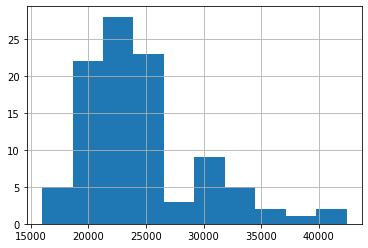

In [7]:
employees = pd.read_excel('data/employees.xls')
employees.SALARY.hist()

не очень нормальное

qq

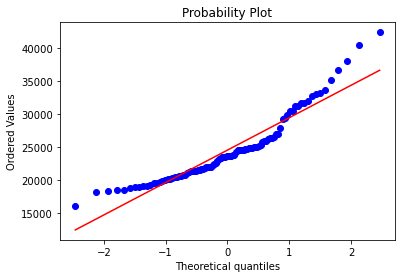

In [15]:
f = stats.probplot(employees.SALARY, dist="norm", plot = plt)

In [20]:
intervals = np.linspace(min(employees.SALARY), max(employees.SALARY),31)
expected = []
observed = []
std = np.std(employees.SALARY)
mu = np.mean(employees.SALARY)
for i in range(1,len(intervals)):
    observed.append(len(employees.SALARY[(employees.SALARY < intervals[i]) & (employees.SALARY >= intervals[i-1])]))
    expected.append((norm.cdf(intervals[i], mu, std) - norm.cdf(intervals[i-1], mu, std))*len(employees.SALARY))

chisquare(observed, expected, ddof = 2)

Power_divergenceResult(statistic=54.71904090529905, pvalue=0.0012413519039254275)

In [24]:
k2, p = stats.normaltest(employees.SALARY)
print("p = {:g}".format(p))
alpha = 0.01
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 3.86165e-06
The null hypothesis can be rejected


In [25]:
stats.shapiro(employees.SALARY)

ShapiroResult(statistic=0.9015016555786133, pvalue=1.6645467439957429e-06)

на Q-Q графике визуально, на основе хи-квадрат теста по 30 бакетам и по тесту D’Agostino and Pearson’s и по тесту Шапиро на 1% мы отвергаем гипотезу о нормальном распределении этой переменной

# Задание 3
Методом перебора найдите наиболее подходящий тип распределения
для выборки, содержащейся в файле sample.csv. Сначала постройте гистограмму, чтобы получить
представление о форме плотности распределения. Затем изучите квантильные графики для разных
распределений. Если будет такая возможность, попробуйте применить какие-то критерии согласия.

<AxesSubplot:>

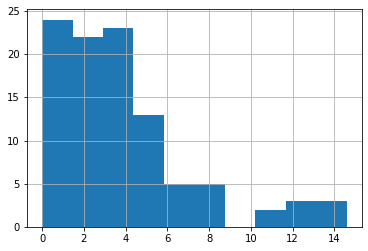

In [28]:
p3df = pd.read_csv('data/sample.csv')
p3df.Sample.hist()

Text(0, 0.5, 'Frequency')

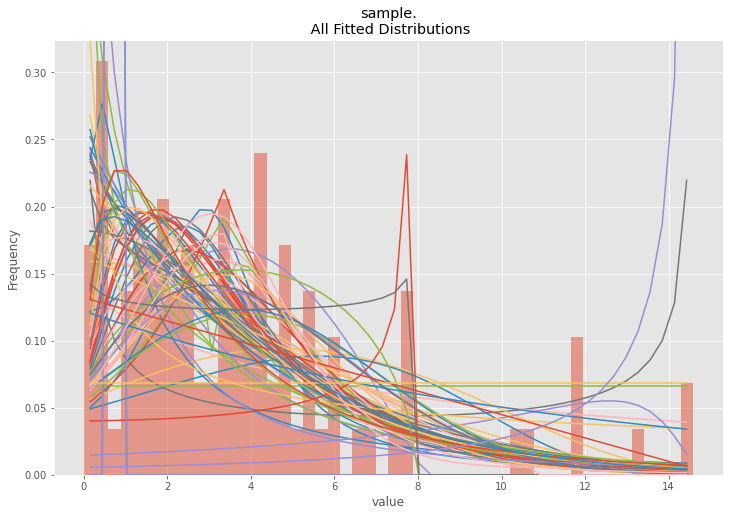

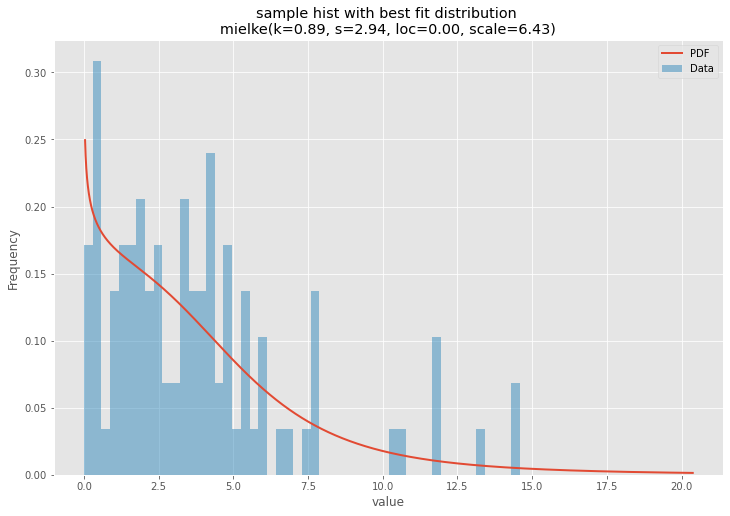

In [38]:

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = p3df.Sample

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', density=True, bins=50, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 50, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'sample.\n All Fitted Distributions')
ax.set_xlabel(u'value')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, alpha=0.5, label='Data', density=True, legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'sample hist with best fit distribution \n' + dist_str)
ax.set_xlabel(u'value')
ax.set_ylabel('Frequency')